In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

In [42]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("X: len -> ", len(X) , " shape -> " ,X.shape , "   ---   y: len -> ", len(y) , " shape -> ", y.shape)

X: len ->  150  shape ->  (150, 4)    ---   y: len ->  150  shape ->  (150,)


In [3]:
sim = cosine_similarity(X, X)
print(sim.shape)
print(sim[0:6,0:6])

(150, 150)
[[1.         0.99857916 0.99998735 0.99910061 0.99975768 0.99900253]
 [0.99857916 1.         0.99879145 0.99879393 0.9972408  0.99692638]
 [0.99998735 0.99879145 1.         0.99921698 0.99966814 0.99903902]
 [0.99910061 0.99879393 0.99921698 1.         0.99871704 0.99913479]
 [0.99975768 0.9972408  0.99966814 0.99871704 1.         0.99929967]
 [0.99900253 0.99692638 0.99903902 0.99913479 0.99929967 1.        ]]


**observation:** 
- The matrix is squared with size 150\*150 as each sample compared with each othersample
- As shown in the first 6\*6 submatrix, The matrix has a diagonal = 1 because each sample is identical to itself which produce a cosine similarity = 1. 

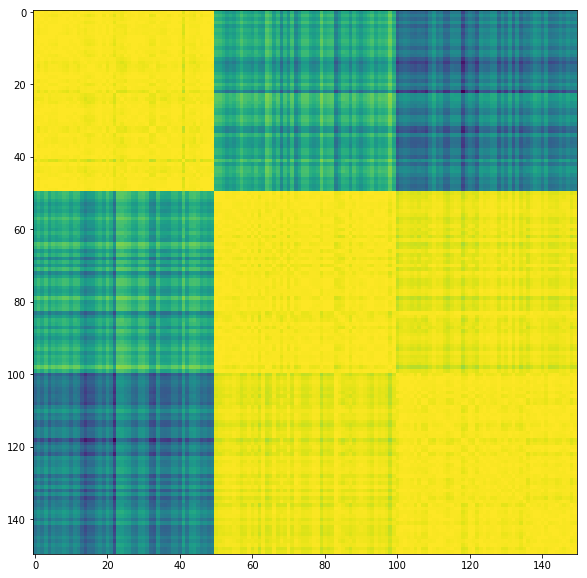

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(sim)

# Visualization

## plot x data for each class alone

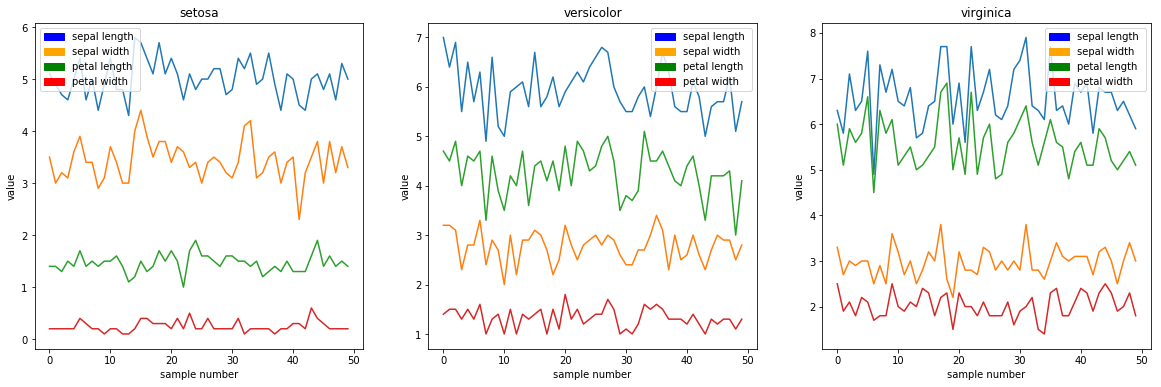

In [64]:
classes = iris.target_names
features = iris.feature_names

red = mpatches.Patch(color='red', label='petal width')
green = mpatches.Patch(color='green', label='petal length')
orange = mpatches.Patch(color='orange', label='sepal width')
blue = mpatches.Patch(color='blue', label='sepal length ')

plt.figure(figsize=(20,6))
for i in range(3):
    Xi = X[i*50:(i+1)*50]
    plt.subplot(1,3,i+1)
    plt.title(classes[i])
    plt.xlabel("sample number")
    plt.ylabel("value")
    plt.legend(handles=[blue,orange,green,red])
    plt.plot(Xi)

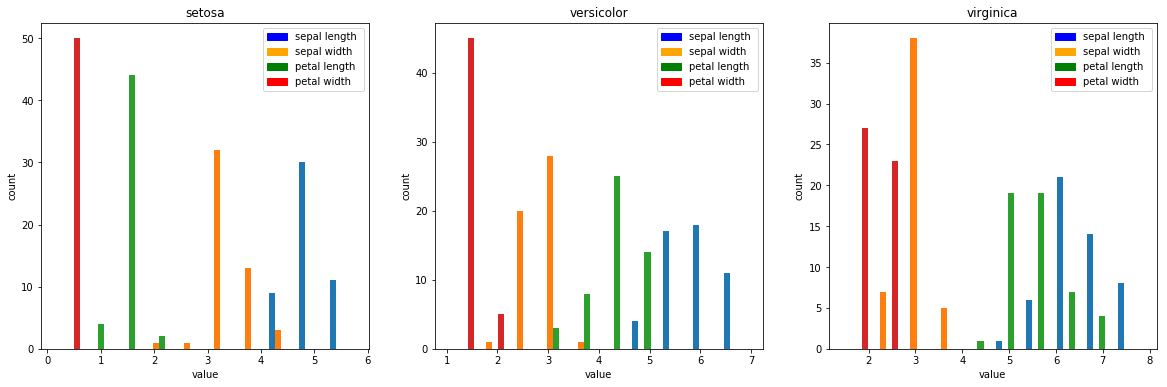

In [63]:
plt.figure(figsize=(20,6))
for i in range(3):
    Xi = X[i*50:(i+1)*50]
    plt.subplot(1,3,i+1)
    plt.title(classes[i])
    plt.xlabel("value")
    plt.ylabel("count")
    plt.legend(handles=[blue,orange,green,red])
    plt.hist(Xi, bins=10)

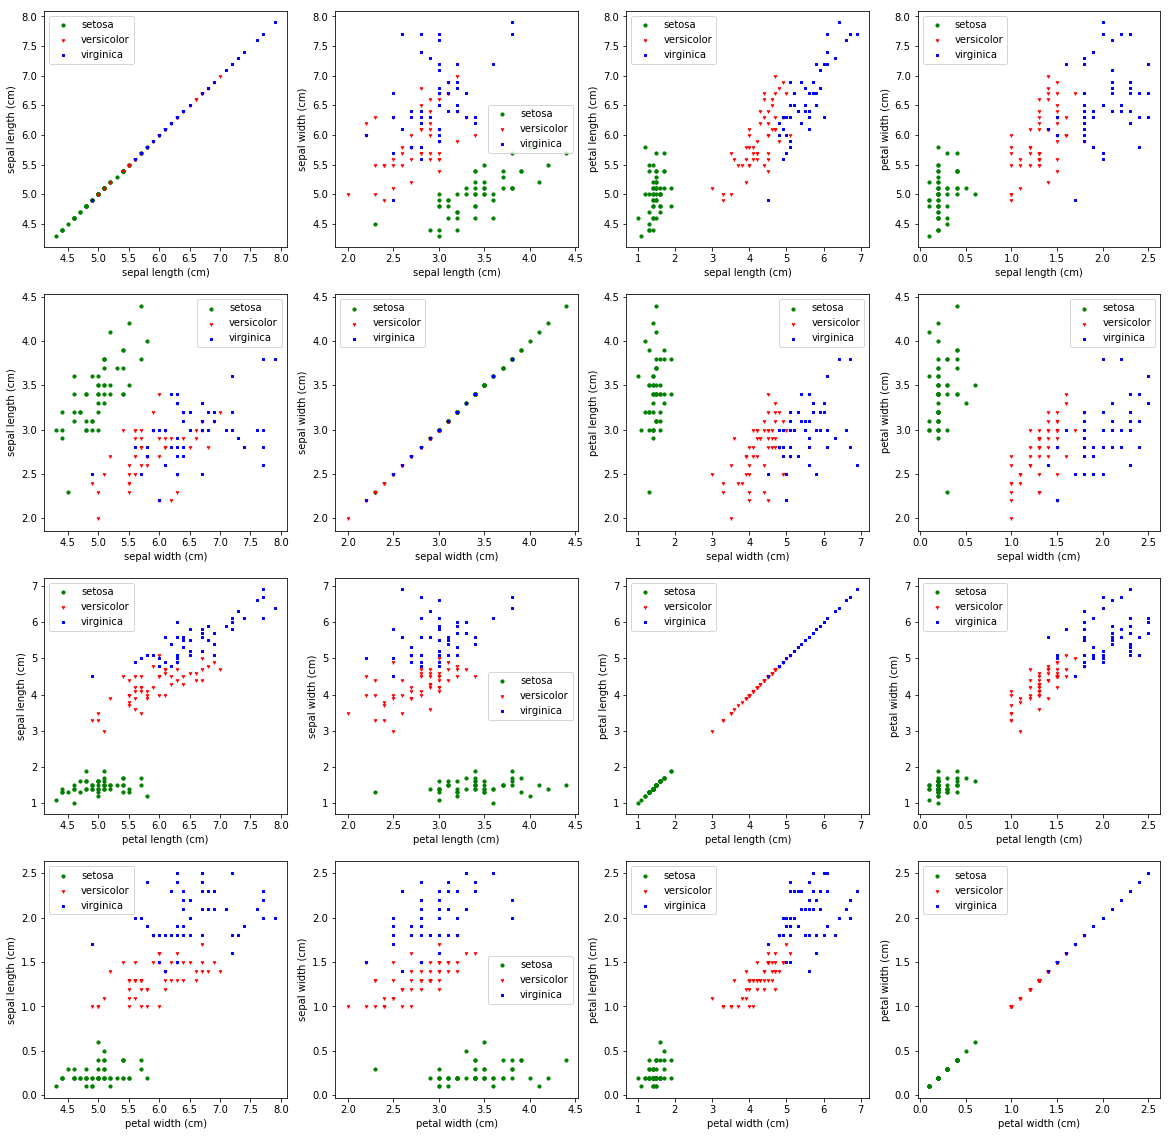

In [77]:
features_data = np.hsplit(X, 4)

plt.figure(figsize=(20,20))
for j in range(4):
    for i in range(4):
        plt.subplot(4,4,((i+1)+(j*4)))
        plt.scatter(features_data[i][0:50], features_data[j][0:50], s=10, c='g', marker="o", label=classes[0])
        plt.scatter(features_data[i][50:100], features_data[j][50:100], s=15, c='r', marker="1", label=classes[1])        
        plt.scatter(features_data[i][100:150], features_data[j][100:150], s=7, c='b', marker="s", label=classes[2])
        plt.xlabel(features[j])
        plt.ylabel(features[i])
        plt.legend()

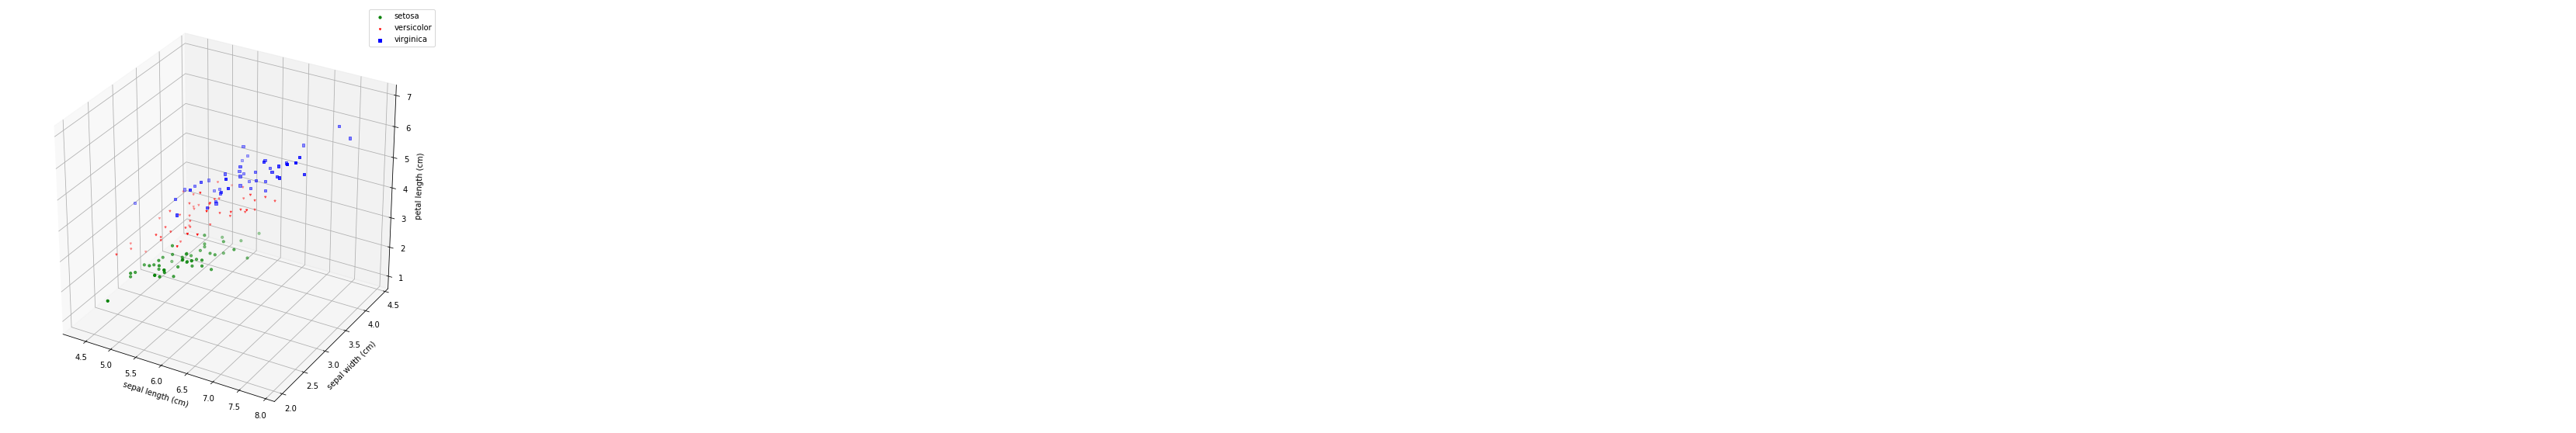

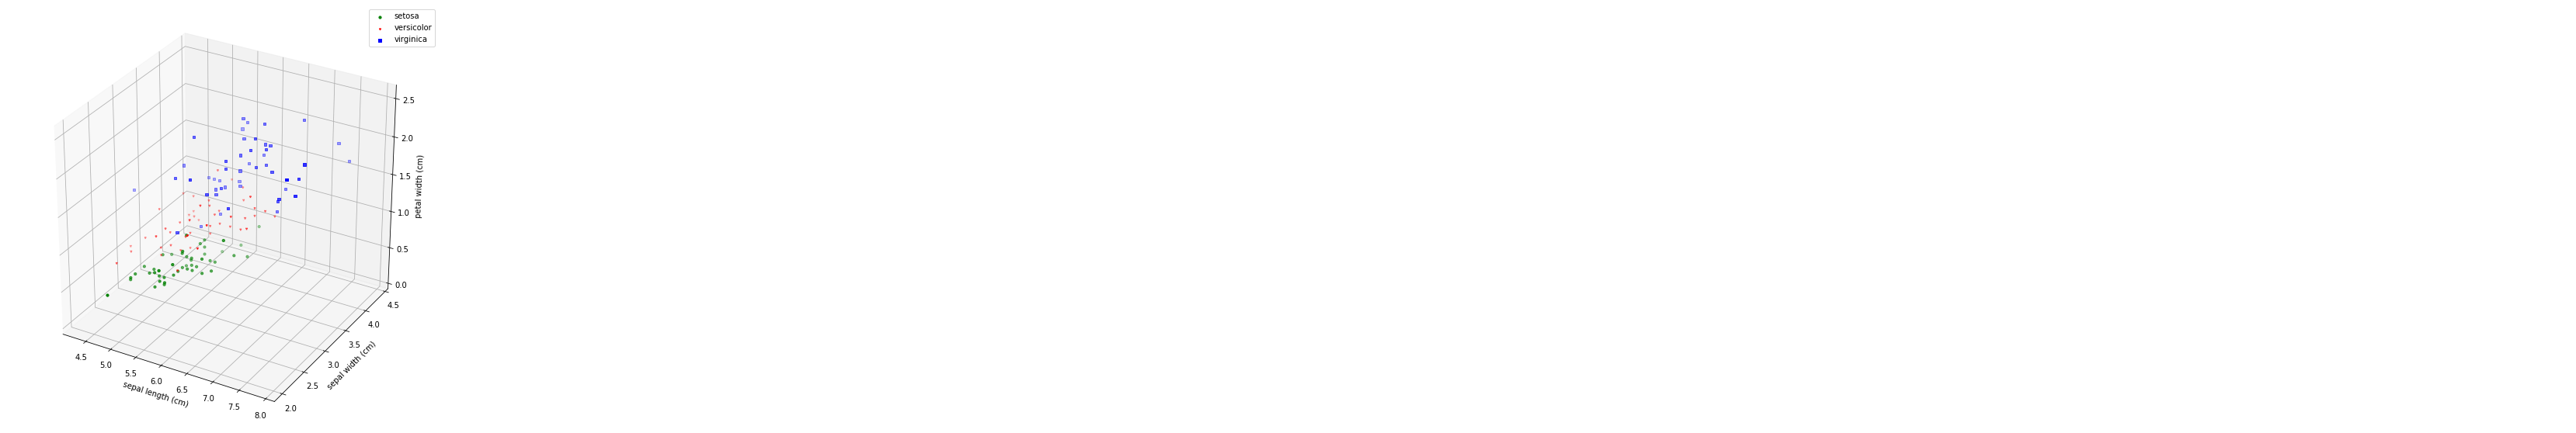

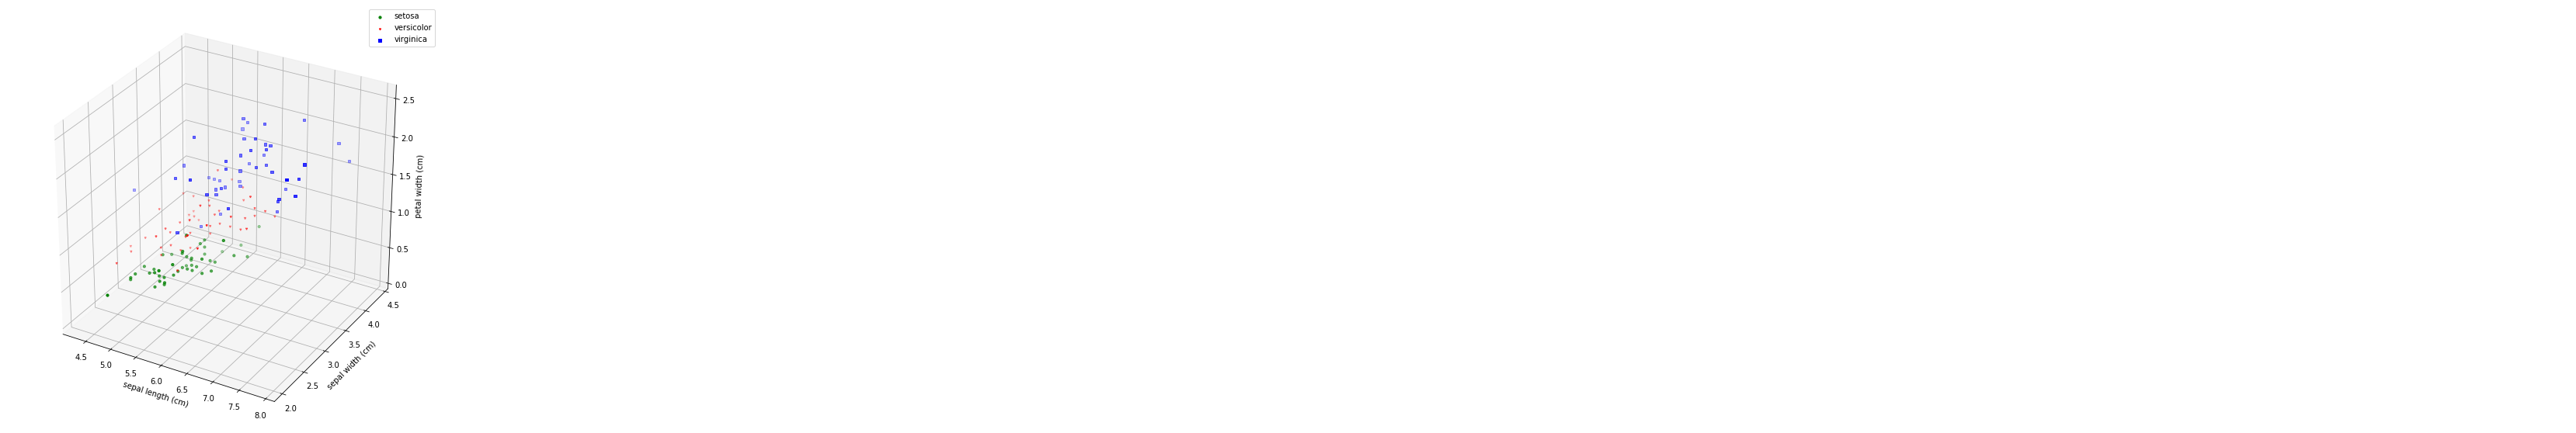

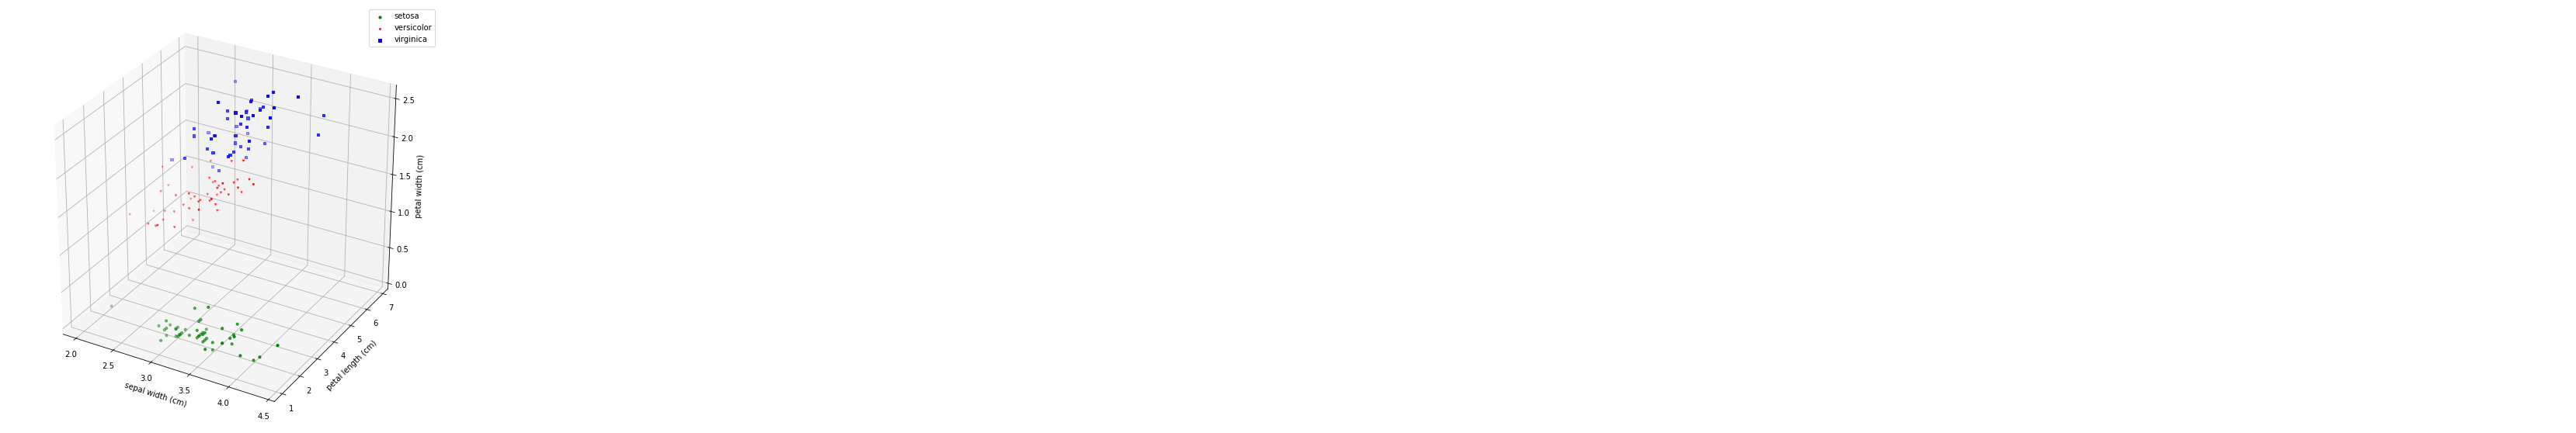

In [109]:
comb = [[0,1,2], [0,1,3], [0,1,3], [1,2,3]] # each possible combination of attributes

for i in range(4): # for each 4 possible combinations of attributes
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(features_data[comb[i][0]][:50], features_data[comb[i][1]][:50], features_data[comb[i][2]][:50], s=10, c='g', marker="o", label=classes[0])
    ax.scatter3D(features_data[comb[i][0]][50:100], features_data[comb[i][1]][50:100], features_data[comb[i][2]][50:100], s=10, c='r', marker="1", label=classes[1])
    ax.scatter3D(features_data[comb[i][0]][100:], features_data[comb[i][1]][100:], features_data[comb[i][2]][100:], s=10, c='b', marker="s", label=classes[2])
    ax.legend()
    ax.set_xlabel(features[comb[i][0]])
    ax.set_ylabel(features[comb[i][1]])
    ax.set_zlabel(features[comb[i][2]])

In [70]:
temp = pd.DataFrame(data=X, columns=features)
temp[:][0:80]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
